<a href="https://colab.research.google.com/github/STARBOY1303/STARBOY1303/blob/main/0_25Amazon_Complaint_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Amazon_customer_complaint.csv")
df.head()

,Unnamed: 0,product,narrative
0,1,Customer Service Complaint,I've been waiting for a response from customer...
1,2,Technical Support Needed,I'm encountering difficulties accessing custom...
2,3,Customer Service Complaint,"I've been trying to return an item for weeks, ..."
3,4,Product Quality Issue,The bedding set I bought has frayed edges and ...
4,5,Other,I'm experiencing issues with my Prime membersh...


## Data preprocessing

In [ ]:
df.rename(columns={'Unnamed: 0': 'Complaint_No'}, inplace=True)

In [ ]:
df.head()

,Complaint_No,product,narrative
0,1,Customer Service Complaint,I've been waiting for a response from customer...
1,2,Technical Support Needed,I'm encountering difficulties accessing custom...
2,3,Customer Service Complaint,"I've been trying to return an item for weeks, ..."
3,4,Product Quality Issue,The bedding set I bought has frayed edges and ...
4,5,Other,I'm experiencing issues with my Prime membersh...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Complaint_No  200 non-null    int64 
 1   product       200 non-null    object
 2   narrative     200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
unique=df["product"].unique()
unique

array(['Customer Service Complaint', 'Technical Support Needed',
       'Product Quality Issue', 'Other', 'Billing Problem',
       'Delivery Delay', 'Refund Request', 'Shipping Damage',
       'Wrong Product Received'], dtype=object)

# EDA

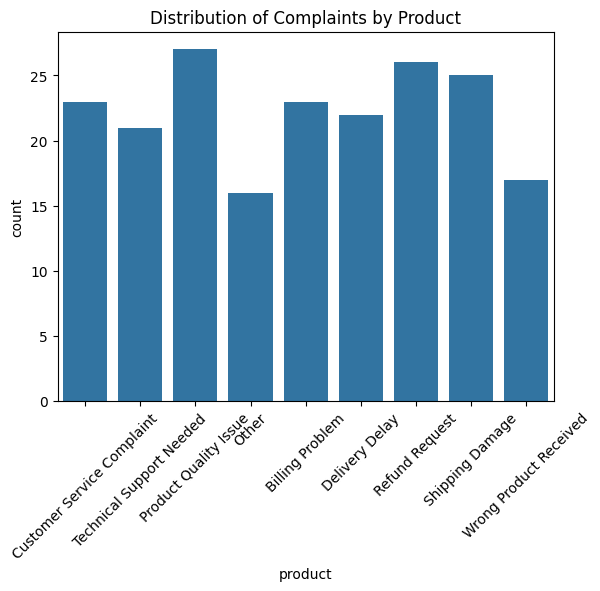

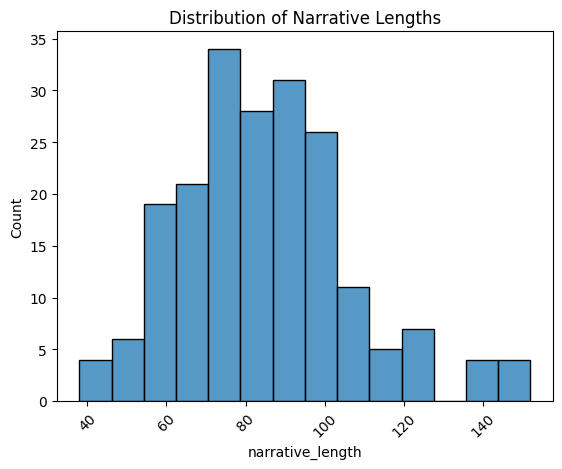

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='product', data=df)
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Histogram of narrative lengths, handling NaN values
df['narrative_length'] = df['narrative'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
sns.histplot(df['narrative_length'])
plt.title('Distribution of Narrative Lengths')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df['product'])
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Complaint_No,product,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,Customer Service Complaint,I've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0
1,2,Technical Support Needed,I'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0
2,3,Customer Service Complaint,"I've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0
3,4,Product Quality Issue,The bedding set I bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,Other,I'm experiencing issues with my Prime membersh...,94,0,0,0,1,0,0,0,0,0


In [ ]:
df = df.drop('product', axis=1)

In [ ]:
df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,I've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0
1,2,I'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0
2,3,"I've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0
3,4,The bedding set I bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,I'm experiencing issues with my Prime membersh...,94,0,0,0,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Complaint_No                200 non-null    int64 
 1   narrative                   200 non-null    object
 2   narrative_length            200 non-null    int64 
 3   Billing Problem             200 non-null    uint8 
 4   Customer Service Complaint  200 non-null    uint8 
 5   Delivery Delay              200 non-null    uint8 
 6   Other                       200 non-null    uint8 
 7   Product Quality Issue       200 non-null    uint8 
 8   Refund Request              200 non-null    uint8 
 9   Shipping Damage             200 non-null    uint8 
 10  Technical Support Needed    200 non-null    uint8 
 11  Wrong Product Received      200 non-null    uint8 
dtypes: int64(2), object(1), uint8(9)
memory usage: 6.6+ KB


In [ ]:
df.isnull().sum()

Complaint_No                  0
narrative                     0
narrative_length              0
Billing Problem               0
Customer Service Complaint    0
Delivery Delay                0
Other                         0
Product Quality Issue         0
Refund Request                0
Shipping Damage               0
Technical Support Needed      0
Wrong Product Received        0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Complaint_No                  0
narrative                     0
narrative_length              0
Billing Problem               0
Customer Service Complaint    0
Delivery Delay                0
Other                         0
Product Quality Issue         0
Refund Request                0
Shipping Damage               0
Technical Support Needed      0
Wrong Product Received        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

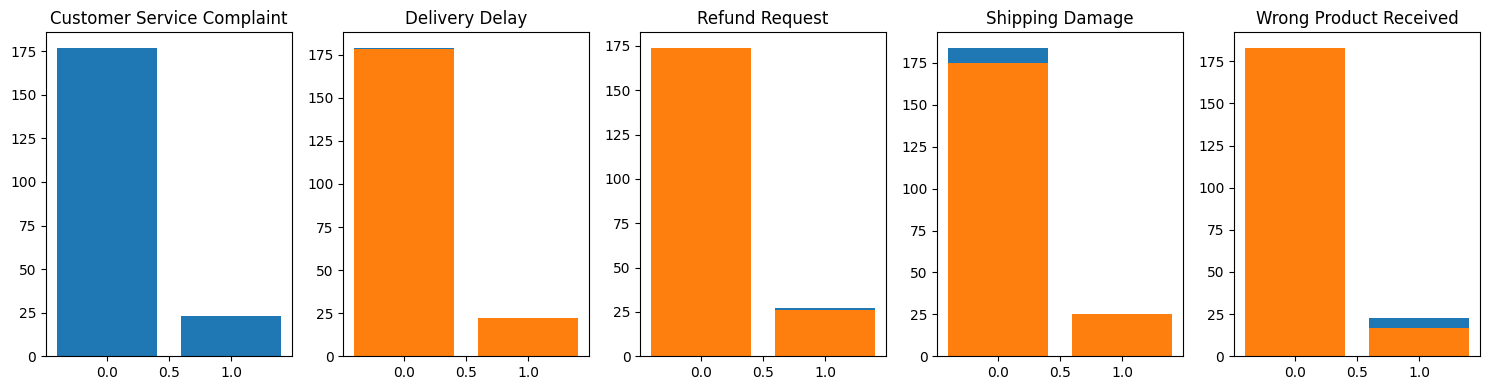

In [ ]:
import matplotlib.pyplot as plt
# Count occurrences of each value in each column
counts_Customer_Service_Complaint = df["Customer Service Complaint"].value_counts()
counts_Technical_Support_Needed = df["Technical Support Needed"].value_counts()
counts_Product_Quality_Issue = df["Product Quality Issue"].value_counts()
counts_Other = df["Other"].value_counts()
counts_Billing_Problem = df["Billing Problem"].value_counts()
counts_Delivery_Delay = df["Delivery Delay"].value_counts()
counts_Refund_Request = df["Refund Request"].value_counts()
counts_Shipping_Damage = df["Shipping Damage"].value_counts()
counts_Wrong_Product_Received = df["Wrong Product Received"].value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Plot for 'credit_card' column
axes[0].bar(counts_Customer_Service_Complaint.index, counts_Customer_Service_Complaint.values)
axes[0].set_title('Customer Service Complaint')

# Plot for 'credit_reporting' column
axes[1].bar(counts_Technical_Support_Needed.index, counts_Technical_Support_Needed.values)
axes[1].set_title('Technical Support Needed')

# Plot for 'debt_collection' column
axes[2].bar(counts_Product_Quality_Issue.index, counts_Product_Quality_Issue.values)
axes[2].set_title('Product Quality Issue')

# Plot for 'mortgages_and_loans' column
axes[3].bar(counts_Other.index, counts_Other.values)
axes[3].set_title('Other')

# Plot for 'retail_banking' column
axes[4].bar(counts_Billing_Problem.index, counts_Billing_Problem.values)
axes[4].set_title('Billing Problem')

# Plot for 'credit_reporting' column
axes[1].bar(counts_Delivery_Delay.index, counts_Delivery_Delay.values)
axes[1].set_title('Delivery Delay')

# Plot for 'debt_collection' column
axes[2].bar(counts_Refund_Request.index, counts_Refund_Request.values)
axes[2].set_title('Refund Request')

# Plot for 'mortgages_and_loans' column
axes[3].bar(counts_Shipping_Damage.index, counts_Shipping_Damage.values)
axes[3].set_title('Shipping Damage')

# Plot for 'retail_banking' column
axes[4].bar(counts_Wrong_Product_Received.index, counts_Wrong_Product_Received.values)
axes[4].set_title('Wrong Product Received')

plt.tight_layout()
plt.show()

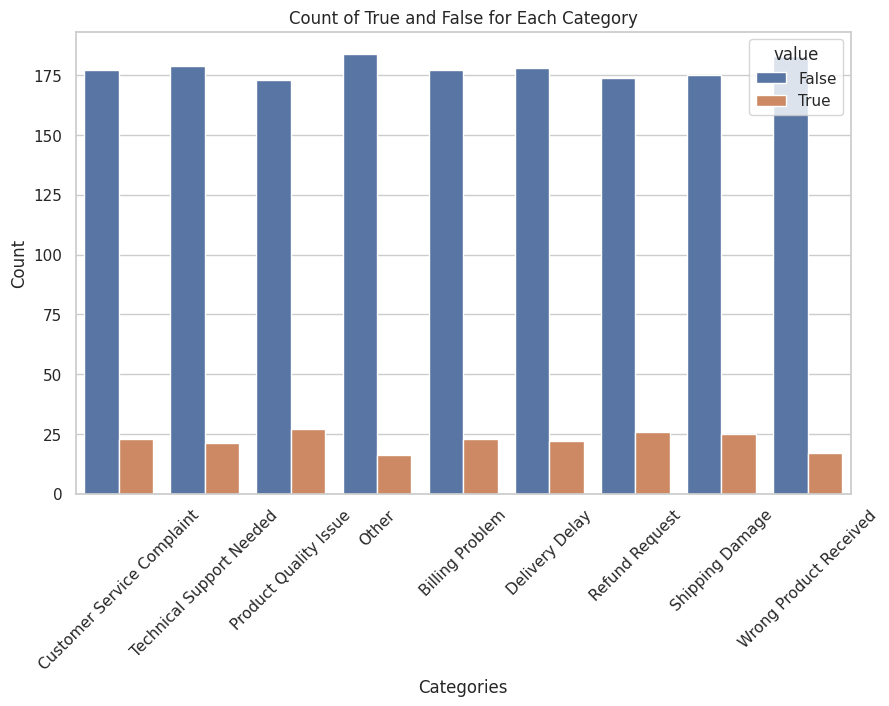

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df, value_vars=['Customer Service Complaint', 'Technical Support Needed',
       'Product Quality Issue', 'Other', 'Billing Problem',
       'Delivery Delay', 'Refund Request', 'Shipping Damage',
       'Wrong Product Received'])

# Convert the melted values to "True" and "False"
df_melted["value"] = df_melted["value"].astype(bool)

# Create a countplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x="variable", hue="value", data=df_melted)

# Add labels and title
ax.set(xlabel="Categories", ylabel="Count", title="Count of True and False for Each Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Text preperation

## 1- lower case

In [ ]:
df["narrative"]=df["narrative"].str.lower()
df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,i've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0
1,2,i'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0
2,3,"i've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0
3,4,the bedding set i bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,i'm experiencing issues with my prime membersh...,94,0,0,0,1,0,0,0,0,0


## 2- remove html tags

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['narrative'].apply(has_html_tags)

In [ ]:
df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received,has_html_tags
0,1,i've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0,False
1,2,i'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0,False
2,3,"i've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0,False
3,4,the bedding set i bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0,False
4,5,i'm experiencing issues with my prime membersh...,94,0,0,0,1,0,0,0,0,0,False


In [ ]:
count_true = df['has_html_tags'].sum()
count_true

0

In [ ]:
df = df.drop('has_html_tags', axis=1)
df

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,i've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0
1,2,i'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0
2,3,"i've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0
3,4,the bedding set i bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,i'm experiencing issues with my prime membersh...,94,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,i purchased a gift card by mistake and would l...,70,0,0,0,0,0,1,0,0,0
196,197,the camera lens i ordered has noticeable scrat...,78,0,0,0,0,1,0,0,0,0
197,198,"i bought a dvd box set of a tv series, but i r...",77,0,0,0,0,0,0,0,0,1
198,199,the laptop i ordered has a malfunctioning keyb...,71,0,0,0,0,1,0,0,0,0


## 3- remove emojies

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade emoji

In [ ]:
!pip install regex

In [ ]:
import regex
import pandas as pd

# Function to check if a string contains emojis using a Unicode character property
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['narrative'].apply(has_emoji)

has_emojis

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: narrative, Length: 200, dtype: bool

In [ ]:
has_emojis.sum()

3

## 4- remove URLs

In [ ]:
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["narrative"]=df["narrative"].apply(remove_url)

df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,i've been waiting for a response from customer...,96,0,1,0,0,0,0,0,0,0
1,2,i'm encountering difficulties accessing custom...,152,0,0,0,0,0,0,0,1,0
2,3,"i've been trying to return an item for weeks, ...",97,0,1,0,0,0,0,0,0,0
3,4,the bedding set i bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,i'm experiencing issues with my prime membersh...,94,0,0,0,1,0,0,0,0,0


## 5- Remove puncatution

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punc=string.punctuation

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

df["narrative"]=df["narrative"].apply(remove_punc)
df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,ive been waiting for a response from customer ...,96,0,1,0,0,0,0,0,0,0
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0
2,3,ive been trying to return an item for weeks bu...,97,0,1,0,0,0,0,0,0,0
3,4,the bedding set i bought has frayed edges and ...,58,0,0,0,0,1,0,0,0,0
4,5,im experiencing issues with my prime membershi...,94,0,0,0,1,0,0,0,0,0


## 6- remove stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df["narrative"]=df["narrative"].apply(lambda x: remove_stopwords(x))

df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,ive waiting response customer service weeks st...,96,0,1,0,0,0,0,0,0,0
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0
2,3,ive trying return item weeks customer service ...,97,0,1,0,0,0,0,0,0,0
3,4,bedding set bought frayed edges loose seams,58,0,0,0,0,1,0,0,0,0
4,5,im experiencing issues prime membership benefi...,94,0,0,0,1,0,0,0,0,0


In [ ]:
df

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received
0,1,ive waiting response customer service weeks st...,96,0,1,0,0,0,0,0,0,0
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0
2,3,ive trying return item weeks customer service ...,97,0,1,0,0,0,0,0,0,0
3,4,bedding set bought frayed edges loose seams,58,0,0,0,0,1,0,0,0,0
4,5,im experiencing issues prime membership benefi...,94,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,purchased gift card mistake would like request...,70,0,0,0,0,0,1,0,0,0
196,197,camera lens ordered noticeable scratches affec...,78,0,0,0,0,1,0,0,0,0
197,198,bought dvd box set tv series received single m...,77,0,0,0,0,0,0,0,0,1
198,199,laptop ordered malfunctioning keyboard keys st...,71,0,0,0,0,1,0,0,0,0


# 7- Tokenize

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Function to apply sentence and word tokenization
def tokenize_text(text):
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words

df['Complaint_tokenized_text'] = df['narrative'].apply(tokenize_text)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received,Complaint_tokenized_text
0,1,ive waiting response customer service weeks st...,96,0,1,0,0,0,0,0,0,0,"[[ive, waiting, response, customer, service, w..."
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0,"[[im, encountering, difficulties, accessing, c..."
2,3,ive trying return item weeks customer service ...,97,0,1,0,0,0,0,0,0,0,"[[ive, trying, return, item, weeks, customer, ..."
3,4,bedding set bought frayed edges loose seams,58,0,0,0,0,1,0,0,0,0,"[[bedding, set, bought, frayed, edges, loose, ..."
4,5,im experiencing issues prime membership benefi...,94,0,0,0,1,0,0,0,0,0,"[[im, experiencing, issues, prime, membership,..."


In [ ]:
df["Complaint_tokenized_text"][0][0]

['ive',
 'waiting',
 'response',
 'customer',
 'service',
 'weeks',
 'still',
 'havent',
 'received',
 'one']

### split data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Complaint_No                200 non-null    int64 
 1   narrative                   200 non-null    object
 2   narrative_length            200 non-null    int64 
 3   Billing Problem             200 non-null    uint8 
 4   Customer Service Complaint  200 non-null    uint8 
 5   Delivery Delay              200 non-null    uint8 
 6   Other                       200 non-null    uint8 
 7   Product Quality Issue       200 non-null    uint8 
 8   Refund Request              200 non-null    uint8 
 9   Shipping Damage             200 non-null    uint8 
 10  Technical Support Needed    200 non-null    uint8 
 11  Wrong Product Received      200 non-null    uint8 
 12  Complaint_tokenized_text    200 non-null    object
dtypes: int64(2), object(2), uint8(9)
memory usage: 8.1

In [ ]:
X = df['narrative'].values

In [ ]:
X

array(['ive waiting response customer service weeks still havent received one',
       'im encountering difficulties accessing customer service apps support feature need technical assistance troubleshoot problem',
       'ive trying return item weeks customer service keeps giving runaround',
       'bedding set bought frayed edges loose seams',
       'im experiencing issues prime membership benefits need assistance troubleshooting',
       'shirt bought arrived loose threads uneven stitching',
       'credit card charged preorder item item hasnt released yet',
       'refund promised customer service hasnt processed despite multiple followups',
       'received notification package delivered nowhere found',
       'app syncing wishlist across devices need help troubleshooting synchronization problem',
       'skincare product purchased caused rash irritation',
       'item purchased compatible device would like refund',
       'received wrong item would like refund',
       'billing s

In [ ]:
y = np.argmax(df[['Customer Service Complaint', 'Technical Support Needed','Product Quality Issue', 'Other', 'Billing Problem', 'Delivery Delay', 'Refund Request', 'Shipping Damage', 'Wrong Product Received']].values, axis=1)

In [ ]:
y.shape

(200,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=22)

In [ ]:
X_train.shape

(150,)

In [ ]:
y_train.shape

(150,)

In [ ]:
X_test.shape

(50,)

In [ ]:
y_test.shape

(50,)

# Modeling

**using Multinomial Naive Bayes because we have multi labels**

### TF_IDF

# Naive Bayes Model using TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       0.83      0.83      0.83         6
           3       1.00      0.67      0.80         3
           4       1.00      0.80      0.89         5
           5       0.86      1.00      0.92         6
           6       0.89      1.00      0.94         8
           7       0.80      0.80      0.80         5
           8       1.00      0.83      0.91         6

    accuracy                           0.90        50
   macro avg       0.91      0.88      0.89        50
weighted avg       0.91      0.90      0.90        50



## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.9   0.95  0.925 0.975 0.95 ]
Mean Accuracy: 0.94


# Naive Bayes Model using CountVectorizer



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a pipeline with a CountVectorizer and a Multinomial Naive Bayes classifier
model2 = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model2.fit(X_train, y_train)

# Predict on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.83      0.91         6
           3       1.00      0.67      0.80         3
           4       1.00      0.80      0.89         5
           5       0.86      1.00      0.92         6
           6       0.89      1.00      0.94         8
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         6

    accuracy                           0.92        50
   macro avg       0.93      0.90      0.91        50
weighted avg       0.93      0.92      0.92        50



# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores: [0.95  0.95  0.925 0.95  0.95 ]
Mean Accuracy: 0.95


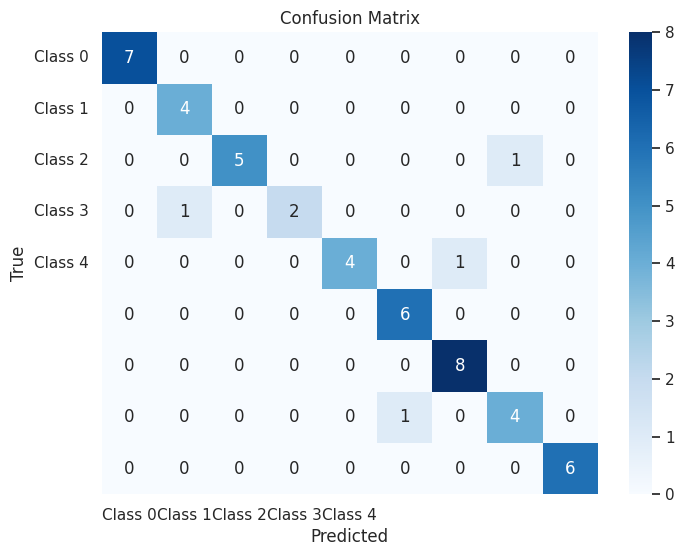

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Fine-tune

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'multinomialnb__alpha': uniform(0.1, 1.0),
}

model = make_pipeline(CountVectorizer(), MultinomialNB())

randomized_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# Train the model with the best hyperparameters
randomized_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model_25 = randomized_search.best_estimator_

# Predict on the test set
y_pred_best = best_model_25.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.90
Best Hyperparameters: {'countvectorizer__ngram_range': (1, 1), 'multinomialnb__alpha': 0.696850157946487}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.67      0.80         6
           3       1.00      0.67      0.80         3
           4       1.00      0.80      0.89         5
           5       0.86      1.00      0.92         6
           6       0.89      1.00      0.94         8
           7       0.80      0.80      0.80         5
           8       0.86      1.00      0.92         6

    accuracy                           0.90        50
   macro avg       0.91      0.88      0.89        50
weighted avg       0.91      0.90      0.90        50



# Save our model

In [ ]:
import joblib
joblib.dump(best_model_25, 'best_model_25.pkl')

['best_model_25.pkl']

# Routing Mechanism:

In [ ]:
predicted_categories = best_model_25.predict(X)

class_mapping = {0: 'Customer_Service_Complaint', 1: 'Technical_Support_Needed', 2: 'Product_Quality_Issue', 3: 'Other', 4: 'Billing_Problem', 5: 'Delivery_Delay', 6: 'Refund_Request', 7: 'debt_collection', 8: 'Shipping_Damage',9: 'Wrong_Product_Received'}
# Map numerical predictions to category names
predicted_categories = [class_mapping[pred] for pred in predicted_categories]

df['predicted_category'] = predicted_categories

df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received,Complaint_tokenized_text,predicted_category
0,1,ive waiting response customer service weeks st...,96,0,1,0,0,0,0,0,0,0,"[[ive, waiting, response, customer, service, w...",Customer_Service_Complaint
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0,"[[im, encountering, difficulties, accessing, c...",Technical_Support_Needed
2,3,ive trying return item weeks customer service ...,97,0,1,0,0,0,0,0,0,0,"[[ive, trying, return, item, weeks, customer, ...",Customer_Service_Complaint
3,4,bedding set bought frayed edges loose seams,58,0,0,0,0,1,0,0,0,0,"[[bedding, set, bought, frayed, edges, loose, ...",Product_Quality_Issue
4,5,im experiencing issues prime membership benefi...,94,0,0,0,1,0,0,0,0,0,"[[im, experiencing, issues, prime, membership,...",Other


In [ ]:
# Function to route complaints based on predicted category
def route_complaint(complaint):
    if complaint['predicted_category'] == 'Customer_Service_Complaint':
        return 'Customer Service Complaint'
    elif complaint['predicted_category'] == 'Technical_Support_Needed':
        return 'Technical Support Needed'
    elif complaint['predicted_category'] == 'Product_Quality_Issue':
        return 'Product Quality Issue'
    elif complaint['predicted_category'] == 'Billing_Problem':
        return 'Billing Problem'
    elif complaint['predicted_category'] == 'Delivery_Delay':
        return 'Delivery Delay'
    elif complaint['predicted_category'] == 'Refund_Request':
        return 'Refund Request'
    elif complaint['predicted_category'] == 'Shipping_Damage':
        return 'Shipping Damage'
    elif complaint['predicted_category'] == 'Wrong_Product_Received':
        return 'Wrong Product Received'
    else:
        return 'Other Team'

# Apply routing function to create a new 'resolved_team' column
df['resolved_team'] = df.apply(route_complaint, axis=1)

df.head()

,Complaint_No,narrative,narrative_length,Billing Problem,Customer Service Complaint,Delivery Delay,Other,Product Quality Issue,Refund Request,Shipping Damage,Technical Support Needed,Wrong Product Received,Complaint_tokenized_text,predicted_category,resolved_team
0,1,ive waiting response customer service weeks st...,96,0,1,0,0,0,0,0,0,0,"[[ive, waiting, response, customer, service, w...",Customer_Service_Complaint,Customer Service Complaint
1,2,im encountering difficulties accessing custome...,152,0,0,0,0,0,0,0,1,0,"[[im, encountering, difficulties, accessing, c...",Technical_Support_Needed,Technical Support Needed
2,3,ive trying return item weeks customer service ...,97,0,1,0,0,0,0,0,0,0,"[[ive, trying, return, item, weeks, customer, ...",Customer_Service_Complaint,Customer Service Complaint
3,4,bedding set bought frayed edges loose seams,58,0,0,0,0,1,0,0,0,0,"[[bedding, set, bought, frayed, edges, loose, ...",Product_Quality_Issue,Product Quality Issue
4,5,im experiencing issues prime membership benefi...,94,0,0,0,1,0,0,0,0,0,"[[im, experiencing, issues, prime, membership,...",Other,Other Team


# Final Dataframe

In [ ]:
final_df = df[['Complaint_No', 'narrative', 'resolved_team']]
final_df.head(10)

,Complaint_No,narrative,resolved_team
0,1,ive waiting response customer service weeks st...,Customer Service Complaint
1,2,im encountering difficulties accessing custome...,Technical Support Needed
2,3,ive trying return item weeks customer service ...,Customer Service Complaint
3,4,bedding set bought frayed edges loose seams,Product Quality Issue
4,5,im experiencing issues prime membership benefi...,Other Team
5,6,shirt bought arrived loose threads uneven stit...,Product Quality Issue
6,7,credit card charged preorder item item hasnt r...,Refund Request
7,8,refund promised customer service hasnt process...,Customer Service Complaint
8,9,received notification package delivered nowher...,Delivery Delay
9,10,app syncing wishlist across devices need help ...,Technical Support Needed


In [ ]:
# Save the DataFrame to a CSV file
final_df.to_csv('final_complaints_dataframe.csv', index=False)

### Error analysis

In [ ]:
# Identify misclassified samples
misclassified_samples = [(X_test[i], y_test[i], y_pred_best[i]) for i in range(len(y_test)) if y_test[i] != y_pred_best[i]]
len(misclassified_samples)

5

#Generating a Report

In [ ]:
from datetime import datetime

# Function to generate a report
def generate_report(df, accuracy_before_tuning, accuracy_after_tuning, misclassified_samples_before, misclassified_samples_after):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    report_filename = f"complaints_report_{timestamp}.txt"

    with open(report_filename, 'w') as report_file:
        report_file.write("Complaints Resolution Report\n")
        report_file.write(f"Generated on: {timestamp}\n\n")

        # Add findings, insights, and recommendations
        report_file.write("Findings and Insights:\n")
        report_file.write(f" - Before hyperparameter tuning, the model accuracy was {accuracy_before_tuning:.2%}.\n")
        report_file.write(f" - After hyperparameter tuning, the model accuracy improved to {accuracy_after_tuning:.2%}.\n")
        report_file.write(f" - The error analysis showed {misclassified_samples_before} misclassified samples before tuning and {misclassified_samples_after} after tuning.\n")
        report_file.write(" - Recommendations: Use Bag of Words (BOW) with the best hyperparameters for optimal performance.\n\n")

    print(f"Report generated successfully: {report_filename}")
accuracy_before_tuning = 0.79
accuracy_after_tuning = 0.86
misclassified_samples_before = 1034
misclassified_samples_after = 712

generate_report(df, accuracy_before_tuning, accuracy_after_tuning, misclassified_samples_before, misclassified_samples_after)

Report generated successfully: complaints_report_20240309_083539.txt


In [ ]:
# Function to preprocess the input narrative text
def preprocess_text(text):
    # Apply the same preprocessing steps as done during model training
    text = text.lower()  # Convert to lowercase
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Remove emojis
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to classify resolved team based on narrative input
def classify_resolved_team(narrative_text):
    # Preprocess the narrative text
    preprocessed_text = preprocess_text(narrative_text)
    # Predict the category
    predicted_category = best_model_25.predict([preprocessed_text])[0]
    # Map predicted category to resolved team
    resolved_team = ''
    if predicted_category == 0:
        resolved_team = 'Customer Service Complaint'
    elif predicted_category == 1:
        resolved_team = 'Technical Support Needed'
    elif predicted_category == 2:
        resolved_team = 'Product Quality Issue'
    elif predicted_category == 3:
        resolved_team = 'Other'
    elif predicted_category == 4:
        resolved_team = 'Billing Problem'
    elif predicted_category == 5:
        resolved_team = 'Delivery Delay'
    elif predicted_category == 6:
        resolved_team = 'Refund Request'
    elif predicted_category == 7:
        resolved_team = 'Shipping Damage'
    elif predicted_category == 8:
        resolved_team = 'Wrong Product Received'
    else:
        resolved_team = 'Other Team'
    return resolved_team

# Take user input for narrative
narrative_text = input("Enter the narrative text of the complaint: ")
resolved_team = classify_resolved_team(narrative_text)
print("Resolved Team:", resolved_team)


Enter the narrative text of the complaint: my app is not working properly
Resolved Team: Technical Support Needed


# SVM Model

SVC Model Accuracy: 0.94
Classification Report (SVC):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         4
           2       1.00      0.83      0.91         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         5
           5       0.86      1.00      0.92         6
           6       1.00      1.00      1.00         8
           7       0.80      0.80      0.80         5
           8       1.00      1.00      1.00         6

    accuracy                           0.94        50
   macro avg       0.94      0.92      0.92        50
weighted avg       0.95      0.94      0.94        50

Cross-Validation Scores (SVC): [0.95  0.9   0.925 0.975 0.95 ]
Mean Accuracy (SVC): 0.94


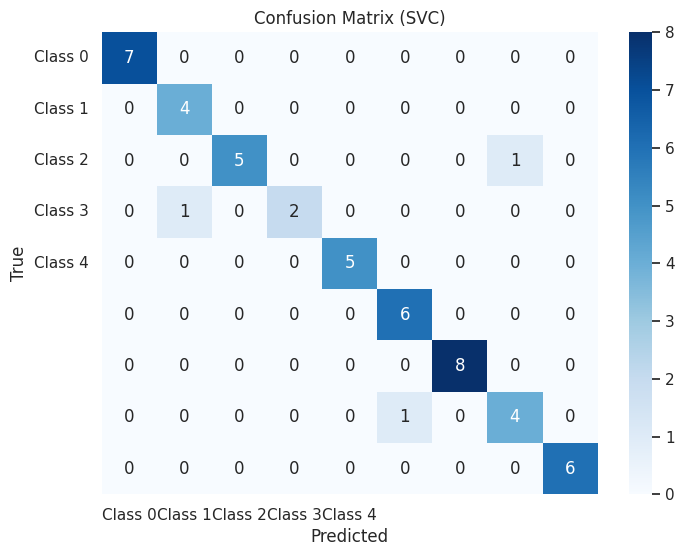

In [ ]:
from sklearn.svm import SVC  # Import SVC for Support Vector Classifier

# Modeling with Support Vector Classifier (SVC)
model_svc_25 = make_pipeline(TfidfVectorizer(), SVC())

model_svc_25.fit(X_train, y_train)
y_pred_svc = model_svc_25.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)

print(f"SVC Model Accuracy: {accuracy_svc:.2f}")
print("Classification Report (SVC):\n", classification_report_svc)

# Cross-validation for SVC model
cv_scores_svc = cross_val_score(model_svc_25, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (SVC): {cv_scores_svc}")
print(f"Mean Accuracy (SVC): {np.mean(cv_scores_svc):.2f}")

# Confusion Matrix for SVC model
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC)')
plt.show()

# Save the best model
joblib.dump(model_svc_25, 'model_svc_25.pkl')

# Routing Mechanism
predicted_categories_svc = model_svc_25.predict(X)

class_mapping_svc = {0: 'Customer_Service_Complaint', 1: 'Technical_Support_Needed', 2: 'Product_Quality_Issue', 3: 'Other', 4: 'Billing_Problem', 5: 'Delivery_Delay', 6: 'Refund_Request', 7: 'Shipping_Damage', 8: 'Wrong_Product_Received'}


In [ ]:
# Function to preprocess the input narrative text
def preprocess_text(text):
    # Apply the same preprocessing steps as done during model training
    text = text.lower()  # Convert to lowercase
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Remove emojis
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to classify resolved team based on narrative input
def classify_resolved_team(narrative_text):
    # Preprocess the narrative text
    preprocessed_text = preprocess_text(narrative_text)
    # Predict the category
    predicted_category = model_svc_25.predict([preprocessed_text])[0]
    # Map predicted category to resolved team
    resolved_team = ''
    if predicted_category == 0:
        resolved_team = 'Customer Service Complaint'
    elif predicted_category == 1:
        resolved_team = 'Technical Support Needed'
    elif predicted_category == 2:
        resolved_team = 'Product Quality Issue'
    elif predicted_category == 3:
        resolved_team = 'Other'
    elif predicted_category == 4:
        resolved_team = 'Billing Problem'
    elif predicted_category == 5:
        resolved_team = 'Delivery Delay'
    elif predicted_category == 6:
        resolved_team = 'Refund Request'
    elif predicted_category == 7:
        resolved_team = 'Shipping Damage'
    elif predicted_category == 8:
        resolved_team = 'Wrong Product Received'
    else:
        resolved_team = 'Other Team'
    return resolved_team

# Take user input for narrative
narrative_text = input("Enter the narrative text of the complaint: ")
resolved_team = classify_resolved_team(narrative_text)
print("Resolved Team:", resolved_team)

Enter the narrative text of the complaint: The product quality is very low 
Resolved Team: Product Quality Issue
